In [1]:
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns
import ipinfo 
import json.decoder

In [2]:
df_credit = pd.read_csv("data\credit_card_fraudCreditModif.csv")



In [43]:
#eliminacion de dato faltantes 
df_credit.dropna(inplace=True)
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7994 entries, 0 to 7999
Data columns (total 18 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Transaction Date and Time                7994 non-null   object 
 1   Transaction Amount                       7994 non-null   float64
 2   Cardholder Name                          7994 non-null   object 
 3   Card Number (Hashed or Encrypted)        7994 non-null   object 
 4   Merchant Name                            7994 non-null   object 
 5   Merchant Category Code (MCC)             7994 non-null   int64  
 6   Transaction Location (City or ZIP Code)  7994 non-null   object 
 7   Transaction Currency                     7994 non-null   object 
 8   Card Type                                7994 non-null   object 
 9   CVV Code (Hashed or Encrypted)           7994 non-null   object 
 10  Transaction Response Code                7994 non-nul

In [93]:
#esto bloque se ejecuto en date frame original
#eliminacion de 2 columnas exceso de datos nulos
'''
df_credit.drop(["User Account Information"], axis=1 , inplace=True)
df_credit.drop(["Previous Transactions"], axis=1 , inplace=True)
'''

'\ndf_credit.drop(["User Account Information"], axis=1 , inplace=True)\ndf_credit.drop(["Previous Transactions"], axis=1 , inplace=True)\n'

In [ ]:
#busca si hay columnas irrelevantes tanto categoricas como numericas
col_catego = []
col_num = ["Transaction Amount","Merchant Category Code (MCC)","Transaction Response Code","Fraud Flag or Label"]
for nom in df_credit:
    if nom not in col_num:
       col_catego.append(nom)

for col in col_catego:
    print(f"columna{col} : {df_credit[col].nunique()} subniveles")

df_credit.describe()
    

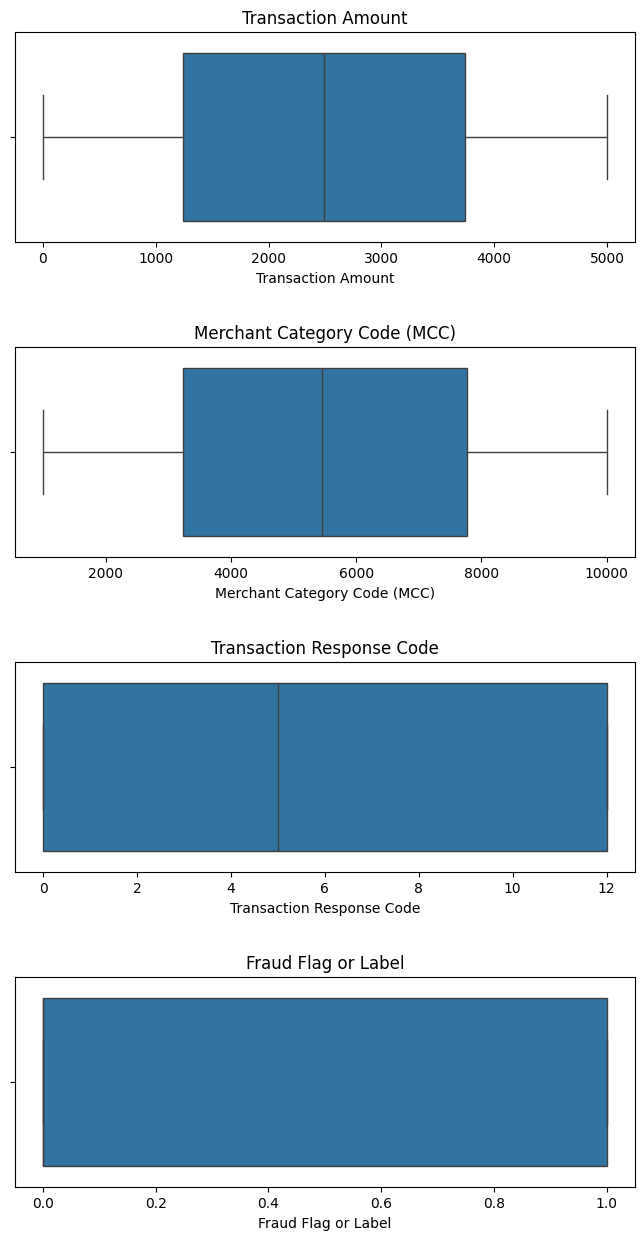

In [3]:
#eliminar filas repetidas

df_credit.drop_duplicates(inplace=True)
#outliers 
#variables numericas 
col_num = ["Transaction Amount","Merchant Category Code (MCC)","Transaction Response Code","Fraud Flag or Label"]

fig, ax = plt.subplots(nrows=len(col_num) , ncols=1 , figsize=(8,15))
fig.subplots_adjust(hspace= 0.5)

for i, col in enumerate(col_num):
    sns.boxplot(x = col, data=df_credit , ax=ax[i])
    ax[i].set_title(col)


In [ ]:
#outliers 
#variables tipo object

col_variables=["Transaction Date and Time","Cardholder Name","Card Number (Hashed or Encrypted)","Merchant Name","Transaction Location (City or ZIP Code)","Transaction Currency","Card Type","CVV Code (Hashed or Encrypted)","Transaction ID","Transaction Source","IP Address","Device Information","City","Country"]

print(len(col_variables))

fig, ax = plt.subplots(nrows=len(col_variables) , ncols=1 , figsize=(10,30))
fig.subplots_adjust(hspace= 1)

for i, col in enumerate(col_variables):
    sns.countplot(x = col, data=df_credit , ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)



In [97]:
#Features relevantes

#(se elimino)Fecha de Vencimiento de la Tarjeta (Columna 9): creo que no aporta nada a la hora de analizar en tiempo real 
#(se elimino)(duda)Notas de transacción (Columna 17): tiene solo informacion adicional que no aporta nada a la hora hacer un analisis y no nos permite ver graficamente un patron de los fraudes
#Numero de tarjeta (columna 3 ): no creo q sea necesario para este analices ya que al hacer una transccion se puede relacionar con el titular de la tarjeta mas no hacen fraudes directos a un numero incriptado pero por dudas no pienso eliminarla.

#este bloque se ejecuto en el date frame original
'''
df_credit.drop(["Card Expiration Date"], axis=1 , inplace=True)
df_credit.drop(["Transaction Notes"], axis=1 , inplace=True)
'''

'\ndf_credit.drop(["Card Expiration Date"], axis=1 , inplace=True)\ndf_credit.drop(["Transaction Notes"], axis=1 , inplace=True)\n'

In [4]:
#modificacion de tipo de datos en el primer date frame

df_credit=df_credit.astype({'Cardholder Name': 'string','Card Number (Hashed or Encrypted)': 'string', 'Merchant Name':'string', 'Transaction Location (City or ZIP Code)':'string', 'Transaction Currency':'string', 'Card Type':'string','CVV Code (Hashed or Encrypted)': 'string' , 'Transaction ID':'string', 'Transaction Source':'string', 'IP Address':'string' , 'Device Information':'string' , 'City':'string' , 'Country':'string'})
df_credit['Transaction Date and Time'] = pd.to_datetime(df_credit['Transaction Date and Time'])
df_credit.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 18 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Transaction Date and Time                8000 non-null   datetime64[ns]
 1   Transaction Amount                       8000 non-null   float64       
 2   Cardholder Name                          8000 non-null   string        
 3   Card Number (Hashed or Encrypted)        8000 non-null   string        
 4   Merchant Name                            8000 non-null   string        
 5   Merchant Category Code (MCC)             8000 non-null   int64         
 6   Transaction Location (City or ZIP Code)  8000 non-null   string        
 7   Transaction Currency                     8000 non-null   string        
 8   Card Type                                8000 non-null   string        
 9   CVV Code (Hashed or Encrypted)           

In [99]:
access_token = "5bba82607ee753"
handler = ipinfo.getHandler(access_token)
ip_address = "34.237.199.33"
details = handler.getDetails(ip_address)
details.city
details.country

'US'

In [100]:
def ip_infoCity(ip_address):
    details = handler.getDetails(ip_address)
    return details.city



In [101]:

#creacion de la columna city
'''
df_credit["City"] = ""

tamaño = 200

# Calcular cuántos bloques se necesitan
num_bloques = (len(df_credit) + tamaño - 1) // tamaño

for i in range(num_bloques):
    start = i * tamaño
    end = min((i + 1) * tamaño, len(df_credit))  # Evitar que end exceda la longitud del DataFrame
    df_credit.loc[start:end, "City"] = df_credit.loc[start:end, "IP Address"].apply(ip_infoCity)



df_credit.info()

'''

'\ndf_credit["City"] = ""\n\ntamaño = 200\n\n# Calcular cuántos bloques se necesitan\nnum_bloques = (len(df_credit) + tamaño - 1) // tamaño\n\nfor i in range(num_bloques):\n    start = i * tamaño\n    end = min((i + 1) * tamaño, len(df_credit))  # Evitar que end exceda la longitud del DataFrame\n    df_credit.loc[start:end, "City"] = df_credit.loc[start:end, "IP Address"].apply(ip_infoCity)\n\n\n\ndf_credit.info()\n\n'

In [102]:
def ip_infoCountry(ip_address):
    try:
        details = handler.getDetails(ip_address)
        return details.country
    
    except  json.decoder.JSONDecodeError:
        return ""



In [103]:
#creacion de la columna country

'''
df_credit["Country"] = ""

tamaño = 100

# Calcular cuántos bloques se necesitan
num_bloques = (len(df_credit) + tamaño - 1) // tamaño

for i in range(num_bloques):
    start = i * tamaño
    end = min((i + 1) * tamaño, len(df_credit))  # Evitar que end exceda la longitud del DataFrame
    df_credit.loc[start:end,"Country"] = df_credit.loc[start:end, "IP Address"].apply(ip_infoCountry)
'''


'\ndf_credit["Country"] = ""\n\ntamaño = 100\n\n# Calcular cuántos bloques se necesitan\nnum_bloques = (len(df_credit) + tamaño - 1) // tamaño\n\nfor i in range(num_bloques):\n    start = i * tamaño\n    end = min((i + 1) * tamaño, len(df_credit))  # Evitar que end exceda la longitud del DataFrame\n    df_credit.loc[start:end,"Country"] = df_credit.loc[start:end, "IP Address"].apply(ip_infoCountry)\n'

In [104]:
#guardar un df
#df_credit.to_csv("data\credit_card_fraudCreditModif.csv" , index =False)


Device Information
Desktop    1349
Mobile     1330
Tablet     1310
Name: count, dtype: int64


C:\Users\Allan\AppData\Local\Temp\ipykernel_4048\1616513008.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Device Information', data=df_top_dispositivos.head(10), palette="viridis")


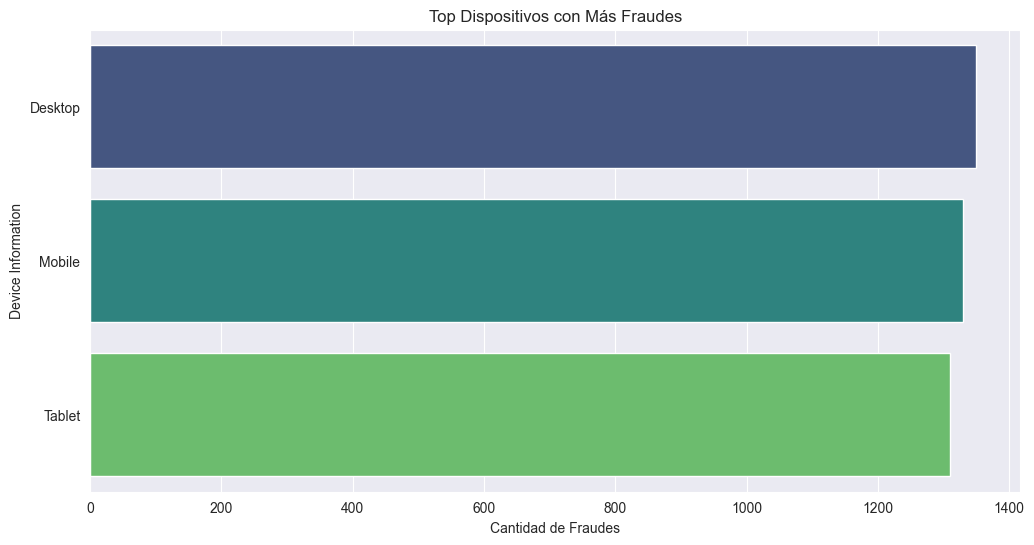

In [20]:
#El top de dispositivo en el que se realiza más fraudes

# Filtra las filas que contienen fraude (aquellas con 'Fraud Flag or Label' igual a 1)
df_fraudes = df_credit[df_credit['Fraud Flag or Label'] == 1]

top_dispositivos = df_fraudes['Device Information'].value_counts()
print(top_dispositivos)


# Convierte el resultado a un DataFrame para facilitar la visualización
df_top_dispositivos = top_dispositivos.reset_index()
df_top_dispositivos.columns = ['Device Information', 'Count']





# Visualización con seaborn
sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Device Information', data=df_top_dispositivos.head(10), palette="viridis")
plt.title('Top Dispositivos con Más Fraudes')
plt.ylabel('Device Information')
plt.xlabel('Cantidad de Fraudes')
plt.show()

C:\Users\Allan\AppData\Local\Temp\ipykernel_4048\2977306245.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Transaction Source', data=df_top_sources , palette="viridis")


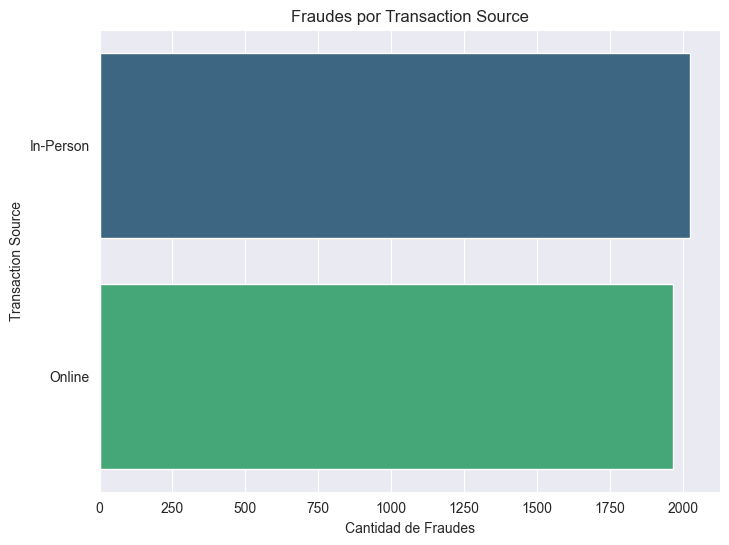

In [19]:
#El transaction source en el que se realiza más fraude



# Filtra las filas que contienen fraude (aquellas con 'Fraud Flag or Label' igual a 1)
df_fraudes = df_credit[df_credit['Fraud Flag or Label'] == 1]

# Agrupa por la columna 'Transaction Source' y cuenta la cantidad de fraudes para cada fuente
top_sources = df_fraudes['Transaction Source'].value_counts()

# Convierte el resultado a un DataFrame para facilitar la visualización
df_top_sources = top_sources.reset_index()
df_top_sources.columns = ['Transaction Source', 'Count']

# Transaction Source con más fraudes
top_transaction_source = df_top_sources.loc[df_top_sources['Count'].idxmax()]


# Visualización con seaborn
sns.set_style("darkgrid")
plt.figure(figsize=(8, 6))
sns.barplot(x='Count', y='Transaction Source', data=df_top_sources , palette="viridis")
plt.title('Fraudes por Transaction Source')
plt.ylabel('Transaction Source')
plt.xlabel('Cantidad de Fraudes')
plt.show()


C:\Users\Allan\AppData\Local\Temp\ipykernel_4700\355123496.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Country', data=df_top_cities.head(10) , palette="viridis")


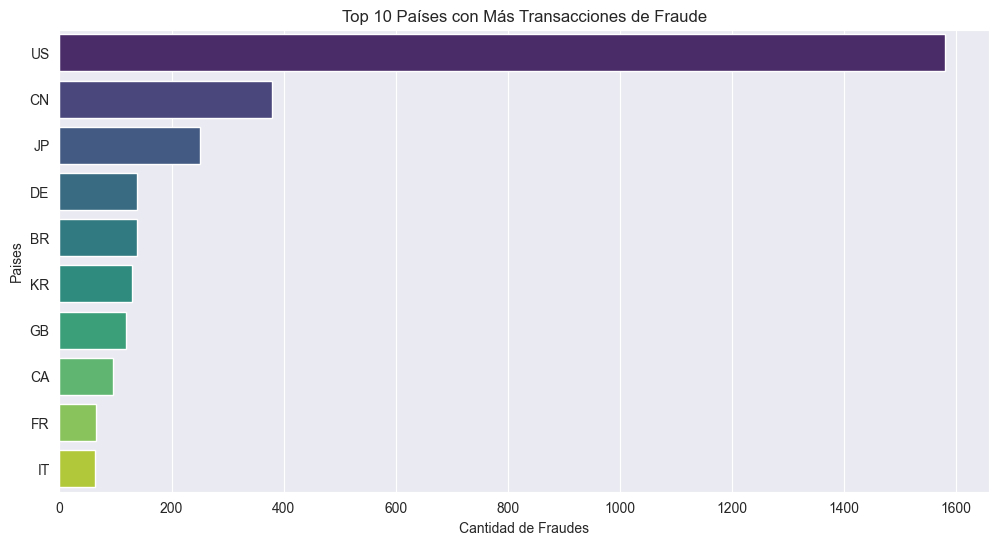

In [6]:
#top 10 de paises

# Filtra las filas que contienen fraude (aquellas con 'Fraud Flag or Label' igual a 1)
df_fraudes = df_credit[df_credit['Fraud Flag or Label'] == 1]

# Agrupa por la columna 'City' y cuenta la cantidad de fraudes para cada ciudad
top_cities = df_fraudes['Country'].value_counts()

# Convierte el resultado a un DataFrame para facilitar la visualización
df_top_cities = top_cities.reset_index()
df_top_cities.columns = ['Country', 'Count']


plt.figure(figsize=(12, 6))
sns.set_style("darkgrid")
sns.barplot(x='Count', y='Country', data=df_top_cities.head(10) , palette="viridis")
plt.title('Top 10 Países con Más Transacciones de Fraude')
plt.ylabel('Paises')
plt.xlabel('Cantidad de Fraudes')
plt.show()

C:\Users\Allan\AppData\Local\Temp\ipykernel_4700\2183699411.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Count" , y="Country", data=df_fraudes_paises.head(10) , palette="viridis")


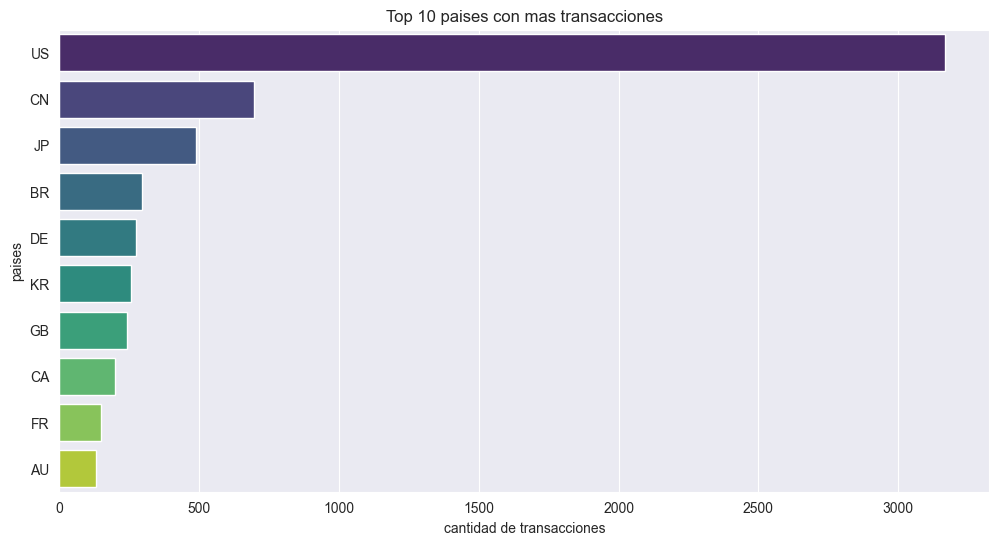

In [13]:


df_fraudes_paises= df_credit["Country"].value_counts()
df_fraudes_paises = df_fraudes_paises.reset_index()
df_fraudes_paises.columns = ["Country" , "Count"]




plt.figure(figsize=(12, 6))
sns.set_style("darkgrid")
sns.barplot(x="Count" , y="Country", data=df_fraudes_paises.head(10) , palette="viridis")
plt.title("Top 10 paises con mas transacciones")
plt.xlabel("cantidad de transacciones")
plt.ylabel("paises")
plt.show()


C:\Users\Allan\AppData\Local\Temp\ipykernel_4048\2729891023.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot( x="Count" ,y ="Card Type" , data=df_top_card_types , palette="viridis")


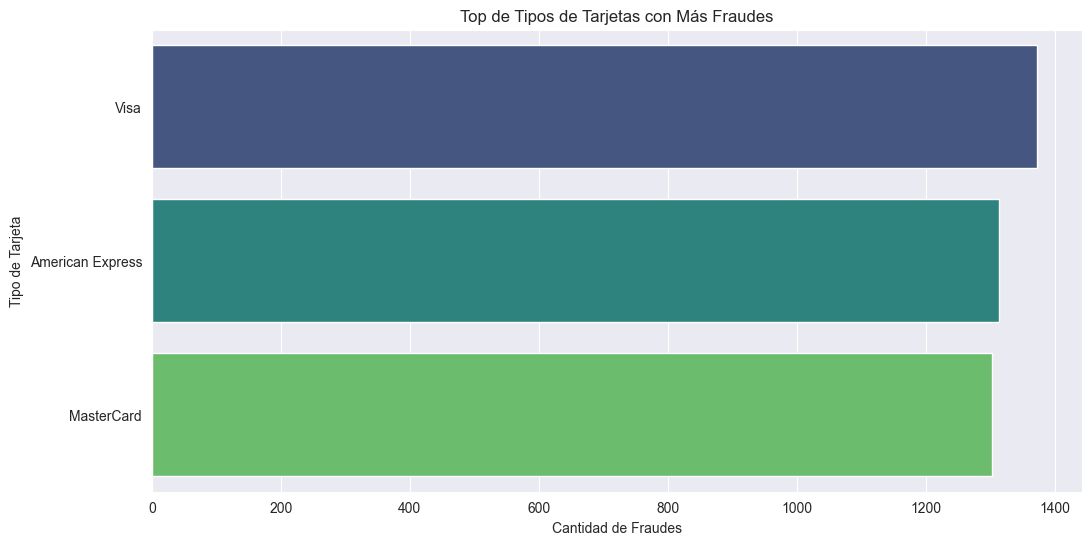

In [17]:
#cards mas fraudolentas

# Filtra las filas que contienen fraude (aquellas con 'Fraud Flag or Label' igual a 1)
df_fraudes = df_credit[df_credit['Fraud Flag or Label'] == 1]

# Agrupa por la columna 'Card Type' y cuenta la cantidad de fraudes para cada tipo de tarjeta
top_card_types = df_fraudes['Card Type'].value_counts()

# Convierte el resultado a un DataFrame para facilitar la visualización
df_top_card_types = top_card_types.reset_index()
df_top_card_types.columns = ['Card Type', 'Count']



sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))
sns.barplot( x="Count" ,y ="Card Type" , data=df_top_card_types , palette="viridis")
plt.title('Top de Tipos de Tarjetas con Más Fraudes')
plt.ylabel('Tipo de Tarjeta')
plt.xlabel('Cantidad de Fraudes')
plt.show()

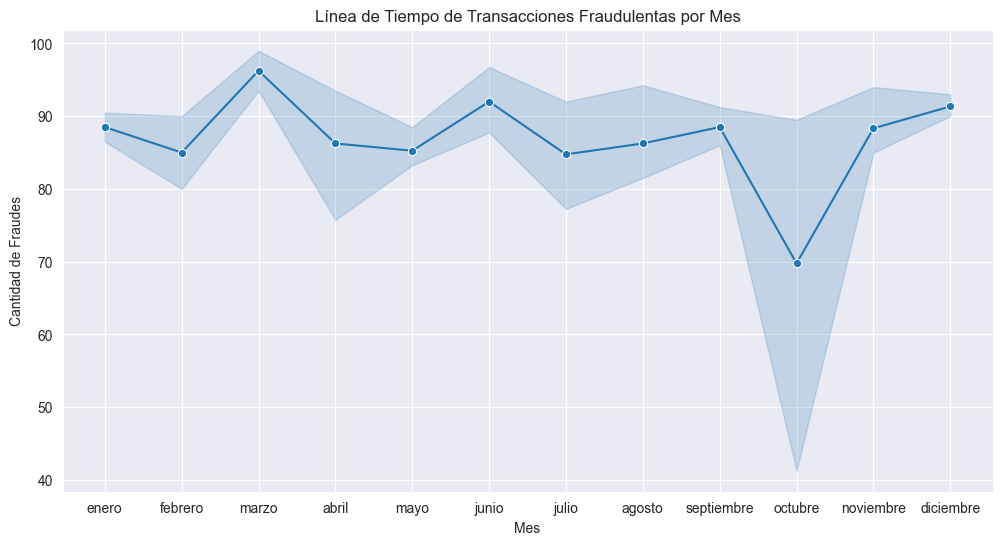

In [16]:
#Linea de tiempo de la cantidad de transacciones fraudulentas por mes

df_credit['Transaction Date and Time'] = pd.to_datetime(df_credit['Transaction Date and Time'])

# Filtra las filas que contienen fraude (aquellas con 'Fraud Flag or Label' igual a 1)
df_fraudes = df_credit[df_credit['Fraud Flag or Label'] == 1]

# Agrupa por mes y cuenta la cantidad de transacciones fraudulentas
#me da una serie
frauds_by_month = df_fraudes.resample('M', on='Transaction Date and Time').size()

# Convierte los índices de fecha a nombres de mes personalizados
meses = ["enero", "febrero", "marzo", "abril", "mayo", "junio", "julio", "agosto", "septiembre", "octubre", "noviembre", "diciembre"]
#i.month extrae el mes del ojecto feha y hora
frauds_by_month.index = [meses[i.month - 1] for i in frauds_by_month.index]


sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x=frauds_by_month.index, y=frauds_by_month.values, marker='o')
plt.title('Línea de Tiempo de Transacciones Fraudulentas por Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Fraudes')
plt.show()

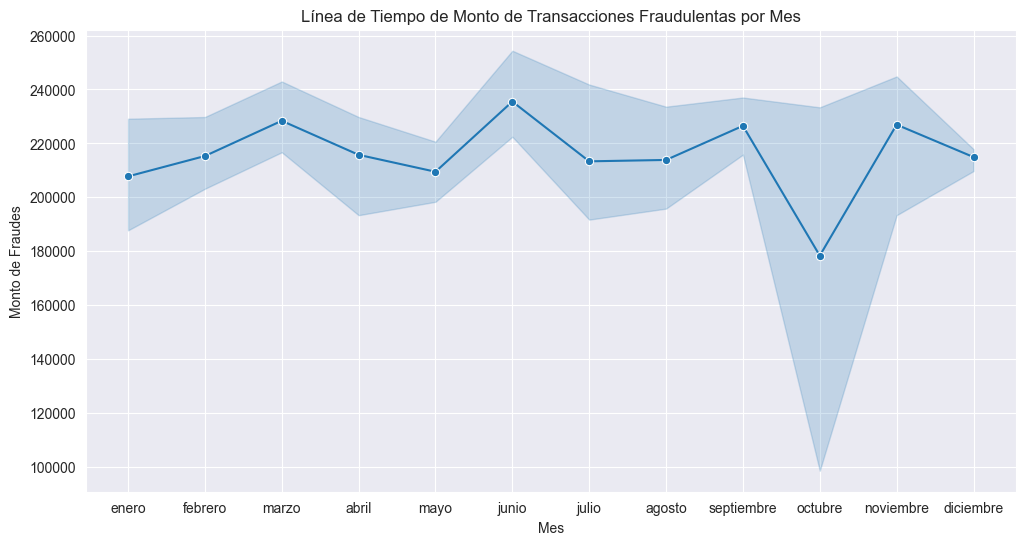

In [16]:
#transsacciones monto por mes 

df_credit['Transaction Date and Time'] = pd.to_datetime(df_credit['Transaction Date and Time'])

# Filtra las filas que contienen fraude (aquellas con 'Fraud Flag or Label' igual a 1)
df_fraudes = df_credit[df_credit['Fraud Flag or Label'] == 1]

# Agrupa por mes y suma el monto de transacciones fraudulentas
frauds_amount_by_month = df_fraudes.resample('M', on='Transaction Date and Time')['Transaction Amount'].sum()

# Convierte los índices de fecha a nombres de mes personalizados
meses = ["enero", "febrero", "marzo", "abril", "mayo", "junio", "julio", "agosto", "septiembre", "octubre", "noviembre", "diciembre"]
frauds_amount_by_month.index = [meses[i.month - 1] for i in frauds_amount_by_month.index]

# Visualización con seaborn
sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x=frauds_amount_by_month.index, y=frauds_amount_by_month.values, marker='o')
plt.title('Línea de Tiempo de Monto de Transacciones Fraudulentas por Mes')
plt.xlabel('Mes')
plt.ylabel('Monto de Fraudes')
plt.show()

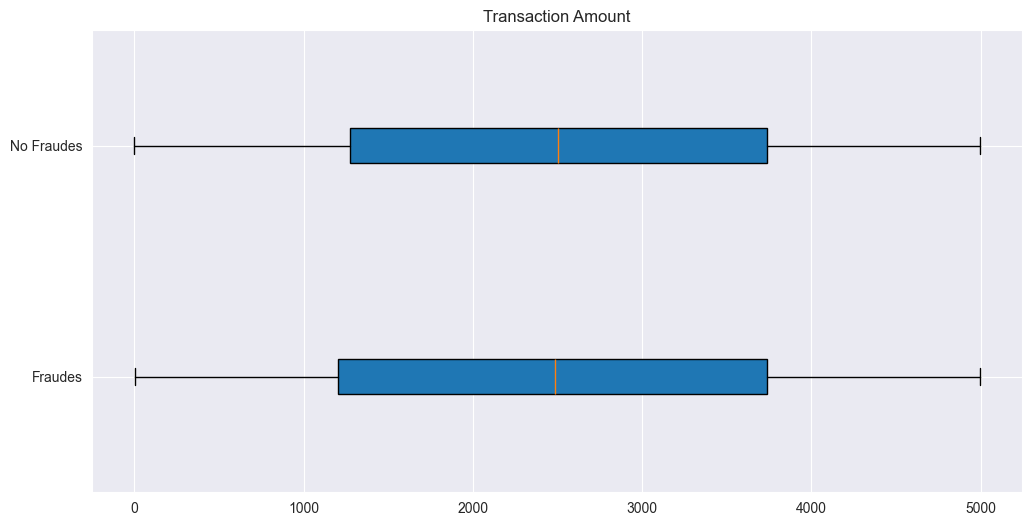

In [26]:
df_fraudes = df_credit[df_credit['Fraud Flag or Label'] == 1]

df_no_fraudes = df_credit[df_credit['Fraud Flag or Label'] ==0]


sns.set_style("darkgrid")
plt.figure(figsize=(12, 6))
plt.boxplot([ df_fraudes["Transaction Amount"] , df_no_fraudes["Transaction Amount"] ] , vert=False  ,patch_artist=True, labels= ["Fraudes" ,"No Fraudes"])
plt.title("Transaction Amount")
plt.show()